In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_csv = "data/mouse_drug_data.csv"
clinical_csv= "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_csv)
clinical_df = pd.read_csv(clinical_csv)
# Combine the data into a single dataset
combined_df =pd.merge(mouse_df,clinical_df,left_on="Mouse ID", right_on = "Mouse ID", how = "outer")
# Display the data table for preview
combined_df


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_by_d_t = combined_df.groupby(["Drug","Timepoint"])['Tumor Volume (mm3)'].mean()
grouped_by_d_t

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
                          ...    
Zoniferol  25           55.432935
           30           57.713531
           35           60.089372
           40           62.916692
           45           65.960888
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [3]:
# Convert to DataFrame
grouped_by_d_t_df = combined_df.groupby(["Drug","Timepoint"])['Tumor Volume (mm3)'].mean().reset_index()
# Preview DataFrame
grouped_by_d_t_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [4]:
grouped_by_d_t_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor = combined_df.groupby(["Drug","Timepoint"])[['Tumor Volume (mm3)']].sem()
# Convert to DataFrame
# Preview DataFrame
sem_tumor_df = sem_tumor.reset_index()
sem_tumor_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [6]:
# Minor Data Munging to Re-Format the Data Frames
reformed_sem_df = pd.pivot_table(sem_tumor,values="Tumor Volume (mm3)", index="Timepoint", columns="Drug" )
# Preview that Reformatting worked
reformed_sem_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [7]:
reformed_sem_df2 = pd.pivot_table(grouped_by_d_t_df,values="Tumor Volume (mm3)", index="Timepoint", columns="Drug")
# reformed_sem_df2

In [8]:
# Generate the Plot (with Error Bars)

# Save the Figure
reformed_df3 = reformed_sem_df2[['Capomulin',"Infubinol", 'Ketapril','Placebo']]
reformed_df3

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


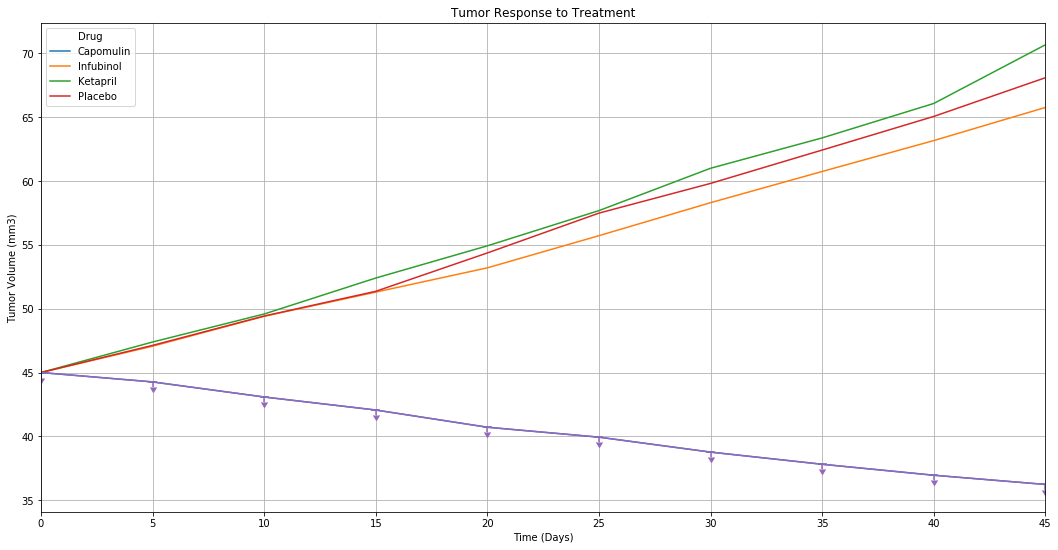

In [9]:

reformed_df3.plot(figsize=(18,9))
# plt.errorbar(reformed_sem_df3.columns(0), reformed_sem_df3. , xerr=0.2, yerr=0.4)
plt.title("Tumor Response to Treatment")
plt.errorbar(reformed_df3.index, reformed_df3["Capomulin"], xerr=0.2, yerr=0.4,uplims= True, label='uplims=True')
# plt.errorbar(reformed_df3.index, reformed_df3["Infubinol"])
# plt.errorbar(reformed_df3.index, reformed_df3["Ketapril"])
# plt.errorbar(reformed_df3.index, reformed_df3["Placebo"])
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()


## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

meta_mean_df = combined_df.groupby(["Drug","Timepoint"])[['Metastatic Sites']].mean()
meta_mean_df

# Convert to DataFrame

# Preview DataFrame

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_meta = combined_df.groupby(["Drug","Timepoint"])[['Metastatic Sites']].sem()
# Convert to DataFrame
sem_meta
# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [12]:
reformed_meta = pd.pivot_table(meta_mean_df,values="Metastatic Sites", index="Timepoint", columns="Drug" )
reformed_meta

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


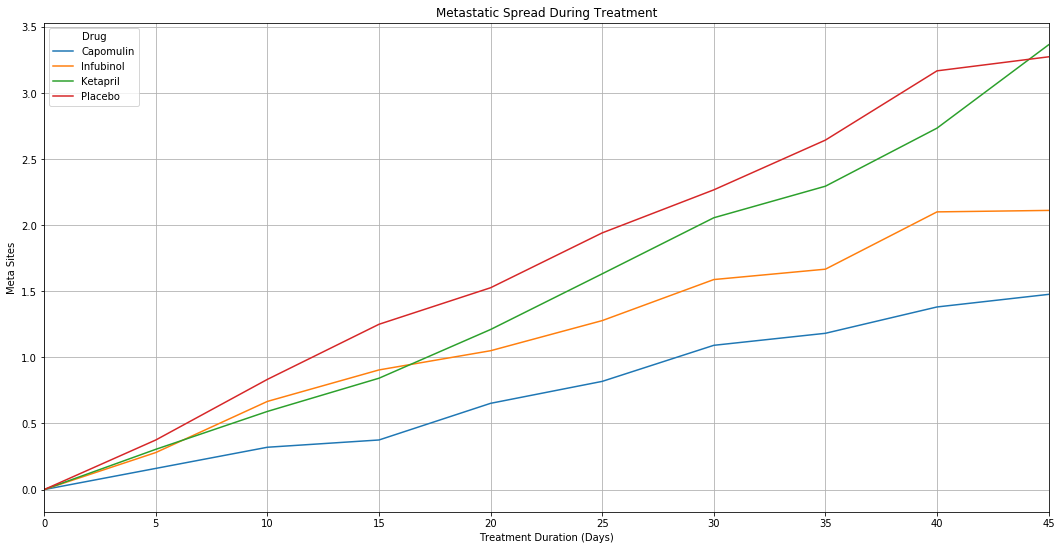

In [13]:
# Minor Data Munging to Re-Format the Data Frames
reformed_meta = reformed_meta[['Capomulin','Infubinol','Ketapril','Placebo']]
# Preview that Reformatting worked
reformed_meta.plot(figsize=(18,9))
plt.title("Metastatic Spread During Treatment")
plt.xlabel('Treatment Duration (Days)')
plt.ylabel("Meta Sites")
plt.grid()
plt.show()

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice_df = combined_df.groupby(["Drug","Timepoint"])[['Mouse ID']].count().reset_index()
count_mice_df

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [15]:
# count_mice_df['Mouse ID'] = count_mice_df['Mouse ID']*4

In [16]:
reformed_mouse_count = pd.pivot_table(count_mice_df,values="Mouse ID", index="Timepoint", columns="Drug" )
reformed_mouse_count 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [18]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame

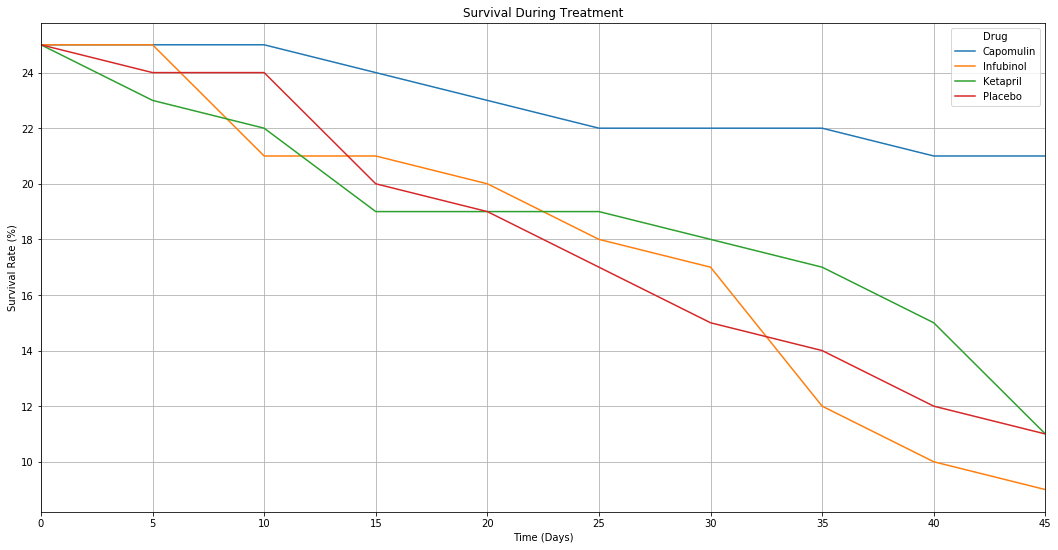

In [19]:
reformed_mouse_count = reformed_mouse_count[['Capomulin', "Infubinol", "Ketapril", "Placebo"]]
reformed_mouse_count.plot(figsize=(18,9))
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.show()

In [25]:
# Generate the Plot (Accounting for percentages)


# Save the Figure

# Show the Figure


## Summary Bar Graph

In [35]:
# Calculate the percent changes for each drug
print("Drug")
lists = []
for col in reformed_sem_df2.columns: 
    name = (reformed_sem_df2.loc[45, col] - reformed_sem_df2.loc[0, col])* (100/reformed_sem_df2.loc[0, col])
    result = f'{col}: {float(name.round(5))}'
    lists.append(result)
    print(result)
# Display the data to confirm

Drug
Capomulin: -19.4753
Ceftamin: 42.51649
Infubinol: 46.12347
Ketapril: 57.02879
Naftisol: 53.92335
Placebo: 51.29796
Propriva: 47.24117
Ramicane: -22.3209
Stelasyn: 52.08513
Zoniferol: 46.57975


In [43]:
# Store all Relevant Percent Changes into a Tuple
lists = tuple(lists)
print(lists)

('Capomulin: -19.4753', 'Ceftamin: 42.51649', 'Infubinol: 46.12347', 'Ketapril: 57.02879', 'Naftisol: 53.92335', 'Placebo: 51.29796', 'Propriva: 47.24117', 'Ramicane: -22.3209', 'Stelasyn: 52.08513', 'Zoniferol: 46.57975')


In [66]:

# Splice the data between passing and failing drugs
# for i in len(lists)-1:
#     if lists[i] < 0:
#         print(lists[i])

lists[0][-8:]
    



# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
# fig.show()

'-19.4753'